In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# I am going to be performing an Exploratory and Descriptive Data Analysis to find out if the prices of houses in Mexico is influenced by their sizes(area)

In [2]:
# read all files into dataframe
df1 = pd.read_csv('mexico-real-estate-1.csv', encoding ='latin-1' )
df2 = pd.read_csv('mexico-real-estate-2.csv', encoding ='latin-1')
df3 = pd.read_csv('mexico-real-estate-3.csv', encoding ='latin-1')

In [3]:
df1.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [4]:
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [5]:
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [6]:
#start data cleaning with df1

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB


In [8]:
# remove null values 
df1.dropna(inplace = True)

In [9]:
# we can see that the nul values has been removed
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     583 non-null    int64  
 1   property_type  583 non-null    object 
 2   state          583 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        583 non-null    int64  
 6   price_usd      583 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 36.4+ KB


In [10]:
# we will remove the '$' and ',' from the price column and also we can see the price type is an object so i am also going to change it to a float
df1["price_usd"] =(df1["price_usd"]
                  .str.replace("$", "", regex = False)
                  .str.replace(",", "").astype(float))

In [11]:
# i will remove Unnamed column
df1.drop(columns =["Unnamed: 0"], inplace = True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    int64  
 5   price_usd      583 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.9+ KB


In [13]:
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [14]:
#remove unnamed column

In [15]:
df2.drop(columns =["Unnamed: 0"], inplace = True)

In [16]:
# remove null values
df2.dropna(inplace = True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  571 non-null    object 
 1   state          571 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        571 non-null    int64  
 5   price_mxn      571 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 31.2+ KB


In [18]:
# the price_mxn column is meant to  be price_usd ad also change type to float
df2["price_usd"] =(df2["price_mxn"]/19).astype(float).round(2)

In [19]:
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,1300000,68421.05
2,house,Morelos,23.634501,-102.552788,360,5300000,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,1250000,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,2120000,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,758190,39904.74


In [20]:
# drop price_mxn column

In [21]:
df2.drop(columns =["price_mxn"], inplace = True)

In [22]:
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [23]:
df3.dropna(inplace = True)

In [24]:
#split lat-lon column to lat and lon respectively
df3[["lat", "lon"]]=df3["lat-lon"].str.split(",", expand = True).astype(float)


In [25]:
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.525890,-99.151703
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.264054,-99.572753
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,6,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [26]:
df3["state"]=df3["place_with_parent_names"].str.split("|",expand=True)[2]

In [27]:
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.525890,-99.151703,Distrito Federal
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.264054,-99.572753,Estado de México
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722,Estado de México
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,6,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728,Jalisco


In [28]:
df3.drop(columns =["place_with_parent_names", "lat-lon", "Unnamed: 0"], inplace = True)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   area_m2        582 non-null    int64  
 2   price_usd      582 non-null    float64
 3   lat            582 non-null    float64
 4   lon            582 non-null    float64
 5   state          582 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 31.8+ KB


In [30]:
df3.dropna(inplace = True)

In [31]:
df =pd.concat([df1,df2,df3])

In [32]:
df.to_csv('mexico-real-estate-clean.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.9+ KB


# I would use a scatter map-box to see what part of mexico the properties are mostly located

In [34]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon ="lon",
    center={"lat": 19.43, "lon": -99.13},
    width =600,
    height =600,
    hover_data= ["price_usd"],
)
fig.update_layout (mapbox_style ="open-street-map")
fig.show()


In [47]:
# what's the top 10 states with the most properties
Top_10_states = df["state"].value_counts().head(10)
Top_10_states

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: state, dtype: int64

In [36]:
#summary stat, checking for outliers, we can see that mean is higher than median or 50 quartile, we can investigate further
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


In [37]:
df["area_m2"] = df["area_m2"].astype(int)

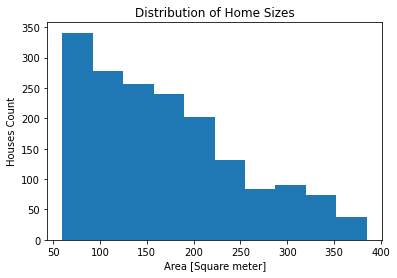

In [38]:
# build histogram to see the visual representation of the distribution
# Build histogram
plt.hist(df["area_m2"])
plt.xlabel("Area [Square meter]")
plt.ylabel("Houses Count")
plt.title ("Distribution of Home Sizes");

# We can see that this distribution is positively skewed meaning houses with smaller sizes are purchased more than houses with bigger sizes. Also, it shows there is outlier in our data. 

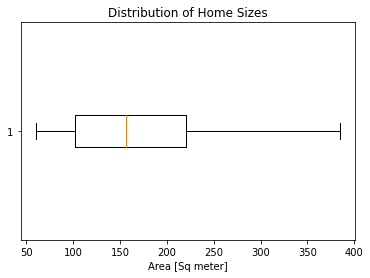

In [39]:
plt.boxplot(df["area_m2"], vert = False)
plt.xlabel("Area [Sq meter]")
plt.title("Distribution of Home Sizes");

In [40]:
#so we also check the distribution of the prices and it's also skewed to the right

Text(0.5, 1.0, 'Distribution of House Prices')

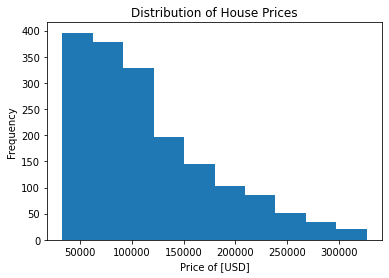

In [41]:
plt.hist(df["price_usd"])
plt.xlabel("Price of [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")

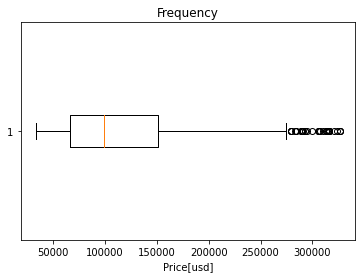

In [42]:
plt.boxplot(df["price_usd"], vert =False)
plt.xlabel("Price[usd]")
plt.title("Frequency");

In [43]:
# we can also notice outleirs present in the boxplot 

In [44]:
# Let's now check the correlation betweeen prrice and area(home sizes)

# what state has the highest most expensive real estate market?

In [55]:
# we will aggregate all states and check the average price of each state
most_expensive_states = df.groupby("state")["price_usd"].mean().sort_values(ascending =False)
most_expensive_states

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

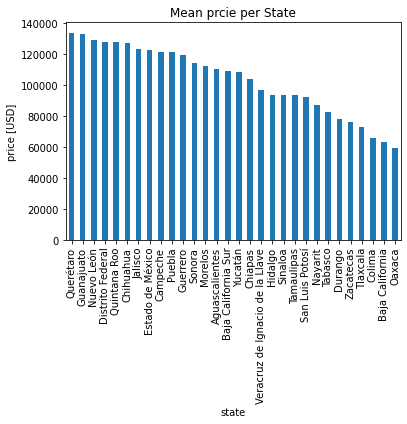

In [61]:
# just to get a visual representation of the mean price per state
most_expensive_states.plot(kind ="bar",
                           xlabel="state",
                           ylabel="price [USD]",
                           title="Mean prcie per State"
);

# According to https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP Queretaro isn't in the top 10 economies by state in mexico, so maybe a better metrics would be to use the price per m2

In [65]:
# create a new dataframe for price per area m2
df["price_per_m2"] = df["price_usd"]/df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


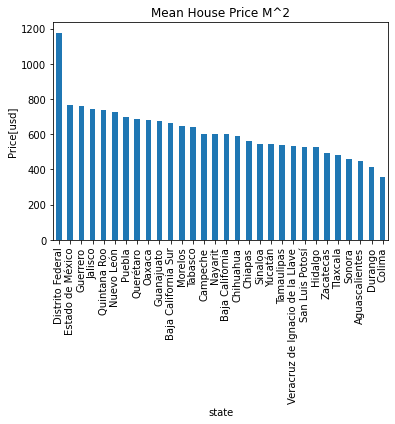

In [67]:
(df
 .groupby("state")["price_per_m2"].mean().sort_values(ascending =False)
 .plot(kind="bar",
       xlabel="state",
       ylabel="Price[usd]",
       title="Mean House Price M^2"))


# Now we can see that Distrito Federal is by far the most expensive state in the real estate market in Mexico and additionally most of the other states is in the Top 10 Economies by state in Mexico

In [108]:
# Is there a relationship between home sizes and price?
p_correlation=df["area_m2"].corr(df["price_usd"])
p_correlation

0.585518245323206

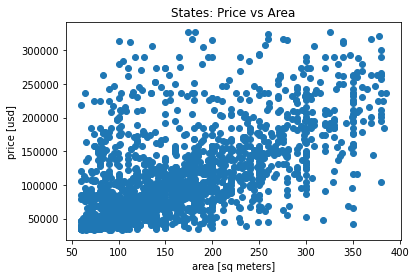

In [118]:
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("area [sq meters]")
plt.ylabel("price [usd]")
plt.title("States: Price vs Area");

# The value is 0.58 so that means there is a moderate relatioship between Home sizes and Price. But does this hold true for every state?


In [ ]:
# let's check the correlation between 3 other states Distrito Federal, morelos and jalisco


# Let's Subset our data

In [87]:
df_morelos = df[df["state"]== "Morelos"]
df_morelos

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
9,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
12,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
21,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
60,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
66,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623
...,...,...,...,...,...,...,...
669,house,Morelos,18.835637,-99.252857,200,63223.78,316.118900
676,apartment,Morelos,18.963312,-99.214456,76,43729.78,575.391842
689,house,Morelos,23.634501,-102.552788,180,63223.78,351.243222
693,house,Morelos,18.842861,-99.225906,120,105372.96,878.108000


In [110]:
df_distrito =df[df["state"]=="Distrito Federal"]
df_distrito

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
17,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
19,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
23,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
24,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
29,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629
...,...,...,...,...,...,...,...
684,apartment,Distrito Federal,19.441809,-99.156423,80,65120.49,814.006125
687,apartment,Distrito Federal,19.391819,-99.188639,84,71653.61,853.019167
688,apartment,Distrito Federal,19.375412,-99.144234,60,105372.96,1756.216000
690,apartment,Distrito Federal,19.496076,-99.204251,60,36260.68,604.344667


In [101]:
df_jalisco =df[df["state"]=="Jalisco"]
df_jalisco

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
50,house,Jalisco,23.634501,-102.552788,107,57955.13,541.636729
91,house,Jalisco,20.785506,-103.442286,98,52423.05,534.929082
128,house,Jalisco,20.532827,-103.483829,155,110641.61,713.816839
130,apartment,Jalisco,20.649012,-103.448288,88,82875.83,941.770795
143,house,Jalisco,20.788616,-103.435217,156,123813.23,793.674551
218,house,Jalisco,20.767952,-103.408990,148,96363.57,651.105203
256,house,Jalisco,20.755833,-103.413251,180,144887.83,804.932389
291,house,Jalisco,20.567506,-103.483320,149,110588.92,742.207517
326,house,Jalisco,20.792152,-103.475021,104,39514.86,379.950577
370,house,Jalisco,20.700756,-103.333385,300,94308.80,314.362667


In [113]:
p_correlation = df_morelos["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.3515973743310168


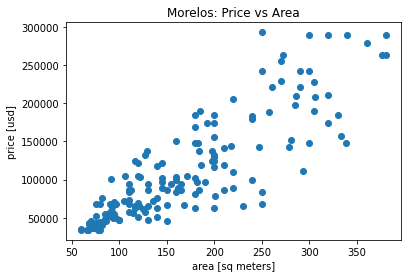

In [114]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("area [sq meters]")
plt.ylabel("price [usd]")
plt.title("Morelos: Price vs Area");

In [112]:
p_correlation = df_distrito["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.13169391513786718


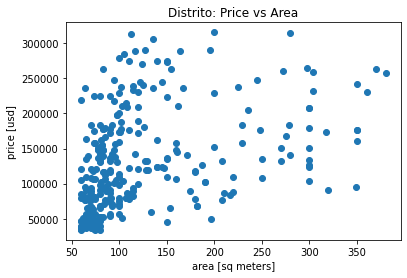

In [111]:
plt.scatter(x=df_distrito["area_m2"], y=df_distrito["price_usd"])
plt.xlabel("area [sq meters]")
plt.ylabel("price [usd]")
plt.title("Distrito: Price vs Area");

In [116]:
p_correlation = df_jalisco["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.34646546012802426


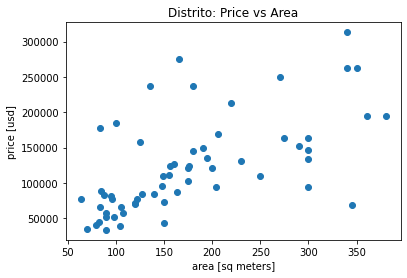

In [115]:
plt.scatter(x=df_jalisco["area_m2"], y=df_jalisco["price_usd"])
plt.xlabel("area [sq meters]")
plt.ylabel("price [usd]")
plt.title("Distrito: Price vs Area");

Looking at the scatter plot and correlation coefficient of these states there's a weak relationship between size and price. 
One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there maybe other factors that have a larger influence on price. 